In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
mapping_dict = {value: index for index, value in enumerate(df['region'].unique())}

In [6]:
df['sex'] = df['sex'].replace({'female': 1, 'male': 0})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['region'] = df['region'].map(mapping_dict)

In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [8]:
print(mapping_dict)

{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}


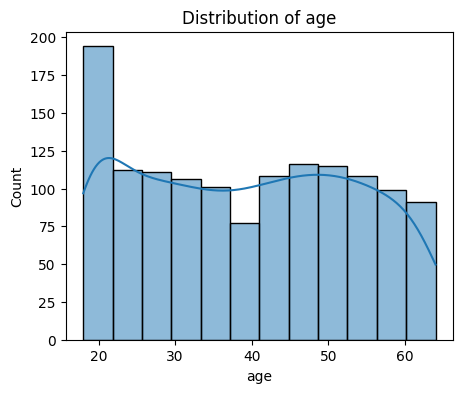

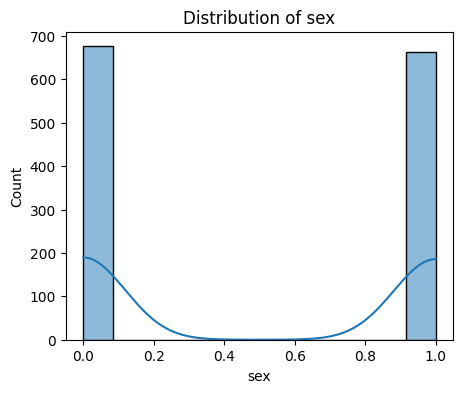

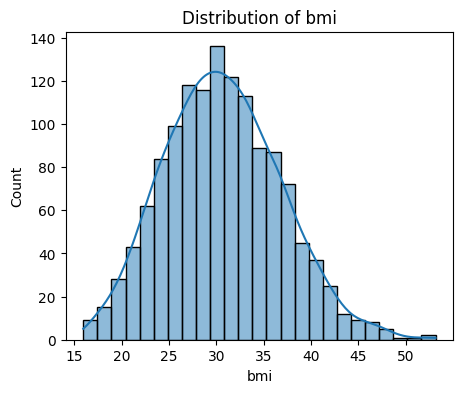

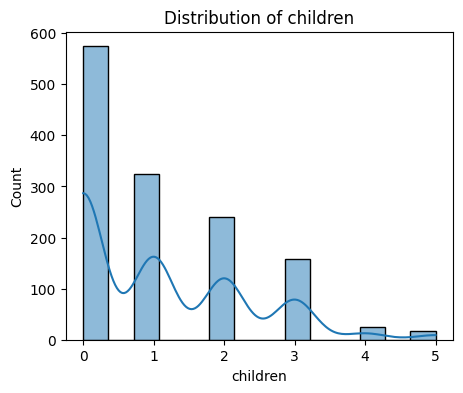

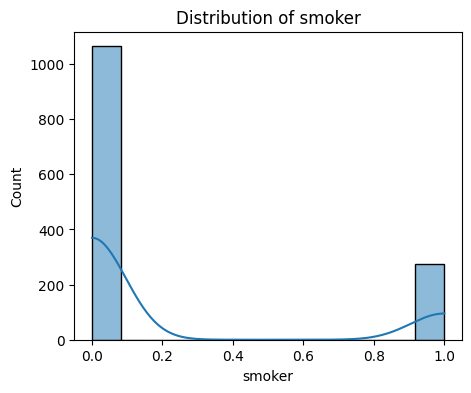

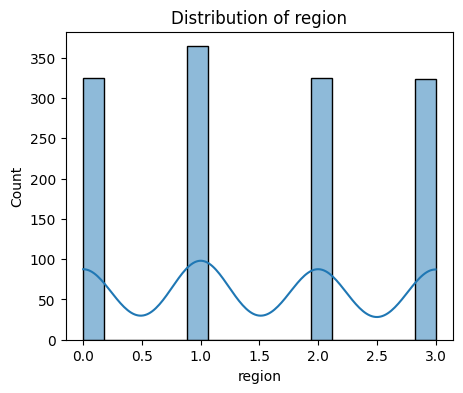

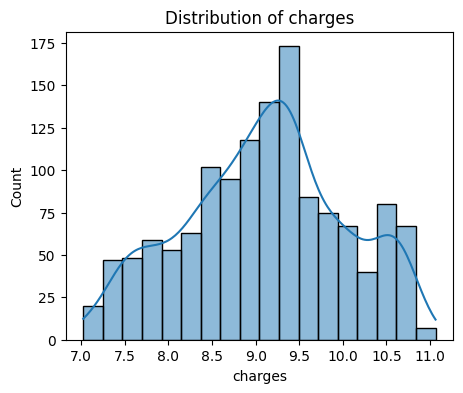

In [14]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.figure(figsize=(5, 4))
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

In [20]:
X = df[['age','bmi','children','smoker','region']]
y = df['charges']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
rf_model = RandomForestRegressor(max_depth=6, oob_score=1.4)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest Mean Squared Error: {rf_mse:.2f}")
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest R2_Score: {rf_r2:.2f}")

Random Forest Mean Squared Error: 0.13
Random Forest R2_Score: 0.86


In [27]:
y_pred_original = np.exp(rf_pred)

In [32]:
pickle_out = open("predictor.pkl", "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

In [59]:
np.exp(rf_model.predict([[25, 30, 0, 0,0]]))

c:\Users\Sandesh Pargaonkar\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3272.00953921])

In [66]:
mapping_dict

{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}